## Correlation: &thinsp; DOC and area of descent (ascent)
descent - wap > 0 <br>
ascent - wap < 0 <br>
<br>

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import skimage.measure as skm
import seaborn as sns
import scipy
from scipy import stats

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *

plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [12]:
variable = 'wap500'

org_options = [
    'rome',
    # 'ni'
    ]

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    'NESM3'           # 14
    ]
datasets = models_cmip5 + models_cmip6

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85', 
    # 'ssp585'
    ]

print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:wap500, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap500   (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               wap
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/e871c66d-4f95-4535-88fe-a6071843749a

In [13]:
data = ds[variable]
data

<xarray.DataArray 'wap500' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

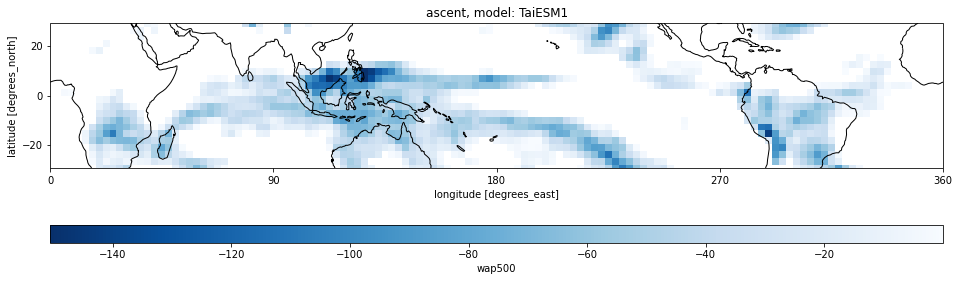

In [14]:
data_options = [
    'ascent',
    # 'descent'
    ]

data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
scene = data.isel(time=0)

if data_options[0] == 'ascent':
    cmap = 'Blues_r'
    title = 'ascent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene<0), cmap = cmap, title = title)
    data = data.where(data<0)

if data_options[0] == 'descent':
    cmap = 'Reds'
    title = 'Descent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene>0), cmap = cmap, title = title)
    data = data.where(data>0)

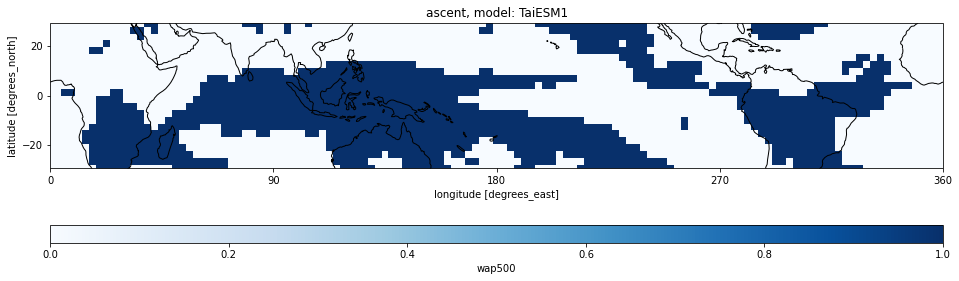

In [15]:
data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
scene = data.isel(time=0)

lat = data.lat.data
lon = data.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

if data_options[0] == 'ascent':
    cmap = 'Blues'
    title = 'ascent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene<0)<0, cmap = cmap, title = title)
    data = data.where(data<0)<0
    data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

if data_options[0] == 'descent':
    cmap = 'Reds'
    title = 'Descent, model: {}'.format(datasets[0])
    plot_scene(scene.where(scene>0)>0, cmap = cmap, title = title)
    data = data.where(data>0)>0
    data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

# (wap_day<0).sum(dim=('lat', 'lon'))/(wap500_ascent.shape[1]*wap500_ascent.shape[2]) # for fraction of gridboxes

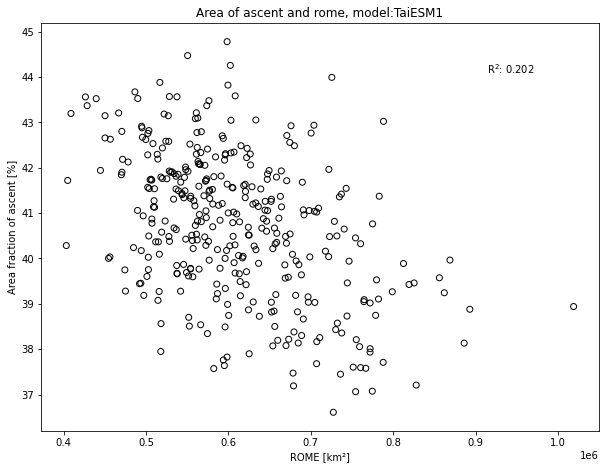

In [16]:
x = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])['rome'].resample(time='M').mean(dim='time')
y = data


fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('Area of ascent and rome, model:{}'.format(datasets[0]))
plt.xlabel('ROME [{}]'.format('km\u00b2'))
plt.ylabel('Area fraction of {} [{}]'.format(data_options[0] ,'%'))
plt.show()

### comparing datasets

In [ ]:
data_options = [
    'ascent',
    # 'descent'
    ]

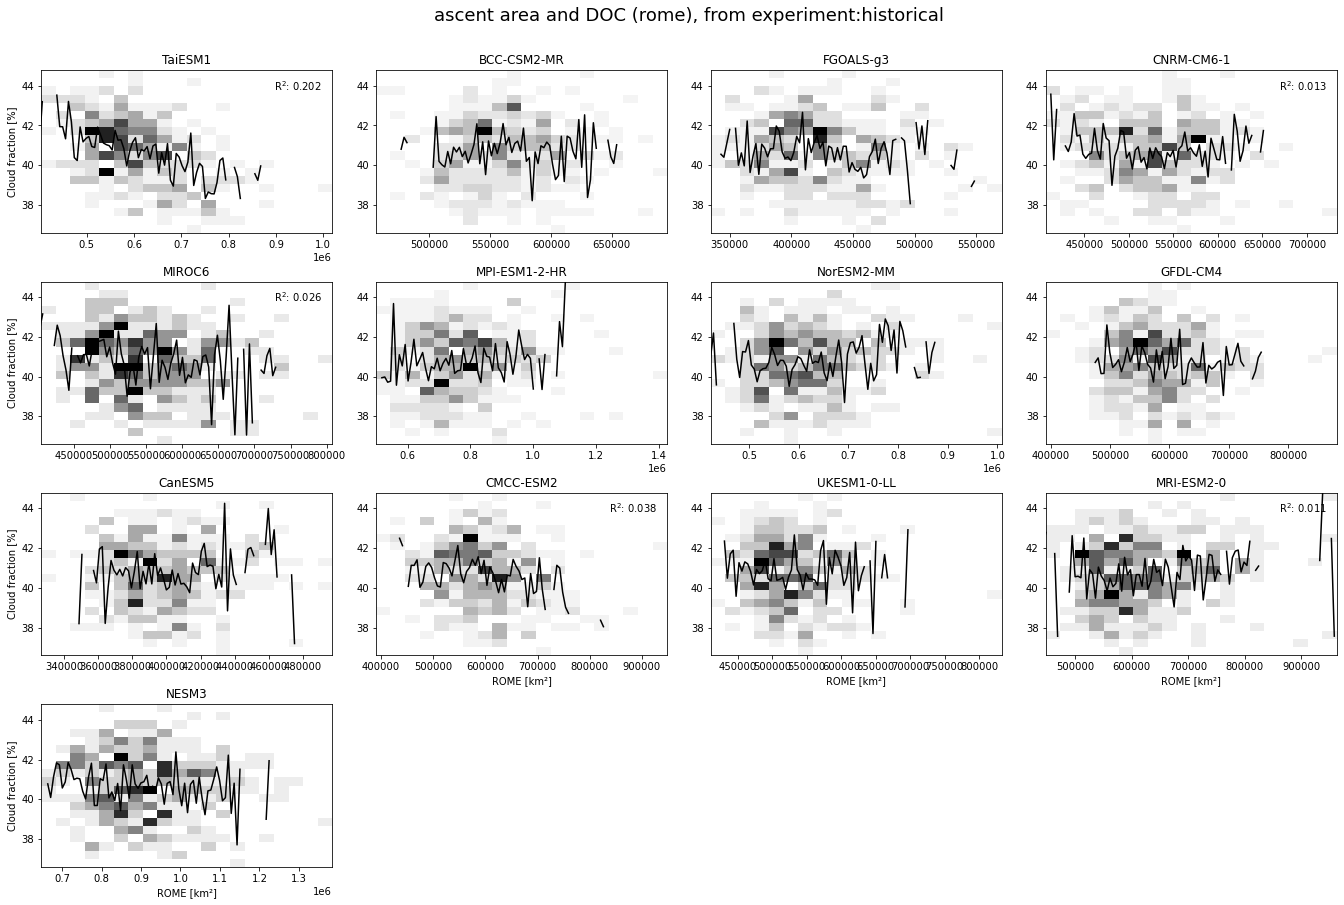

In [19]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = org.resample(time='M').mean(dim='time', keep_attrs=True)

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])[variable]
        if data_options[0] == 'ascent':
            cmap = 'Blues'
            data = data.where(data<0)<0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

        if data_options[0] == 'descent':
            cmap = 'Reds'
            data = data.where(data>0)>0
            data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = data

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} area and DOC ({}), from experiment:{}'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = org.resample(time='M').mean(dim='time', keep_attrs=True)

    data = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])[variable]
    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y = data
    y = y.assign_coords(time=x.time)


    # plot_scatter(x, y , ax)
    
    plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
    plot_bins(x,y, ax)


    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Cloud fraction [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

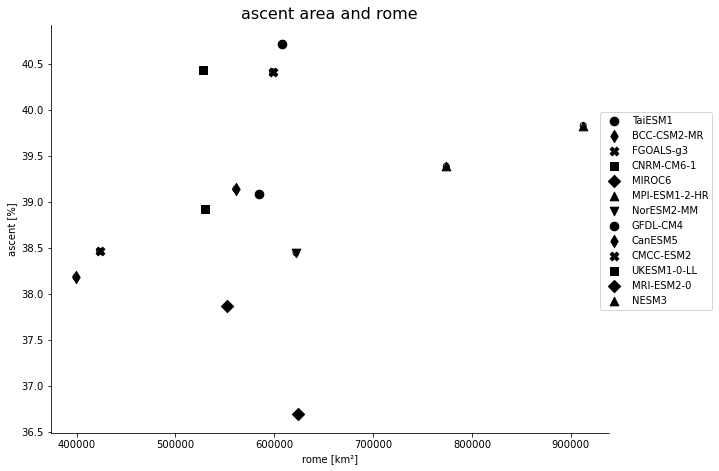

In [21]:
order, colors = orderByTas(False, datasets, experiments[0], resolutions[0])

x= []
y= []
for dataset in datasets:
    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x_data = org.mean(dim=('time'))
    x = np.append(x, x_data)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

    if data_options[0] == 'ascent':
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y_data = data.mean(dim='time')

    y = np.append(y, y_data)

fig, ax = plt.subplots()
title = '{} area and {}'.format(data_options[0], org_options[0])
xlabel = '{} [{}]'.format(org_options[0], org.units)
ylabel = '{} [{}]'.format(data_options[0], '%')

plot_scatter(x,y,ax)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.975,0.8))

sns.despine(top=True, right=True, left=False)
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

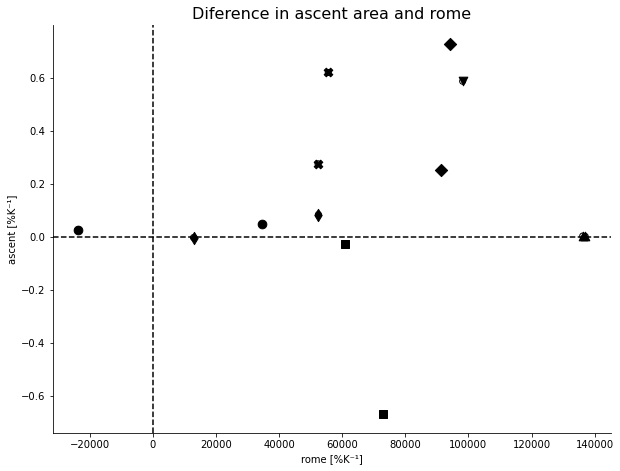

In [23]:
order, colors = orderByTasdiff(False, datasets, models_cmip5, resolutions[0])

x= []
y= []
for dataset in datasets:
    x_historical = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    x_rcp = get_metric(org_options[0], dataset, experiment = 'ssp585', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    xdiff = x_rcp - x_historical
    
    fractional_change = False
    if fractional_change:
        xdiff = (xdiff/x_historical)*100

    divide_by_tasdiff = False
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        xdiff = xdiff/tasdiff
    x = np.append(x, xdiff)

    data = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])[variable]
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    

    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_historical = data.mean(dim='time')


    data = get_dsvariable(variable, dataset, experiment = 'ssp585', resolution=resolutions[0])[variable]
    if data_options[0] == 'ascent':
        cmap = 'Blues'
        data = data.where(data<0)<0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

    if data_options[0] == 'descent':
        cmap = 'Reds'
        data = data.where(data>0)>0
        data = (data*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_rcp = data.mean(dim='time')

    datadiff = data_rcp - data_historical

    fractional_change = True
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff
    y = np.append(y, datadiff)


fig, ax = plt.subplots()
title = 'Diference in {} area and {}'.format(data_options[0], org_options[0])
xlabel = '{} [{}]'.format(org_options[0], '%' + 'K' + chr(0x207B) + chr(0x00B9))
ylabel = '{} [{}]'.format(data_options[0], '%' + 'K' + chr(0x207B) + chr(0x00B9))

plot_scatter(x,y,ax)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    # plt.legend(bbox_to_anchor=(0.975,0.55))

sns.despine(top=True, right=True, left=False)
plt.axvline(0, color= 'k',  linestyle="--")
plt.axhline(0, color= 'k',  linestyle="--")
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()